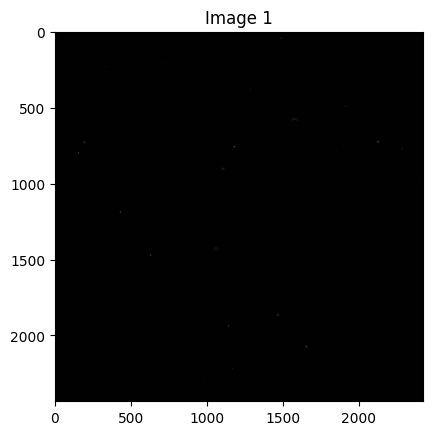

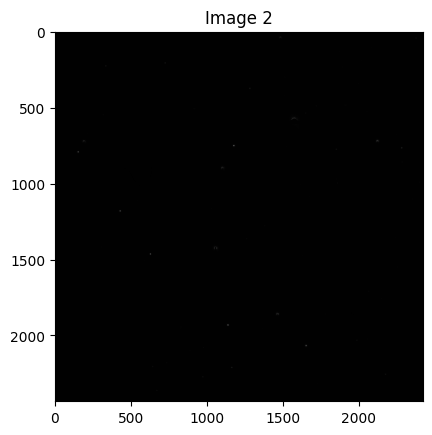

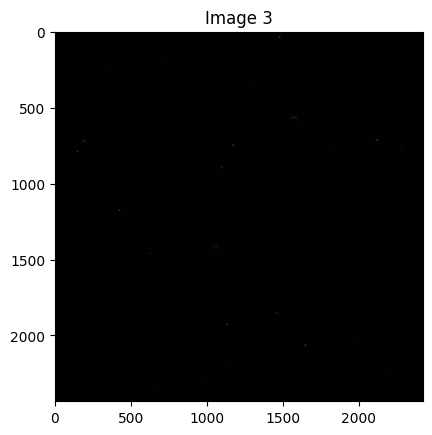

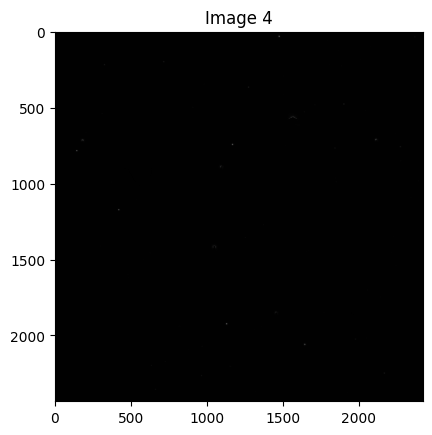

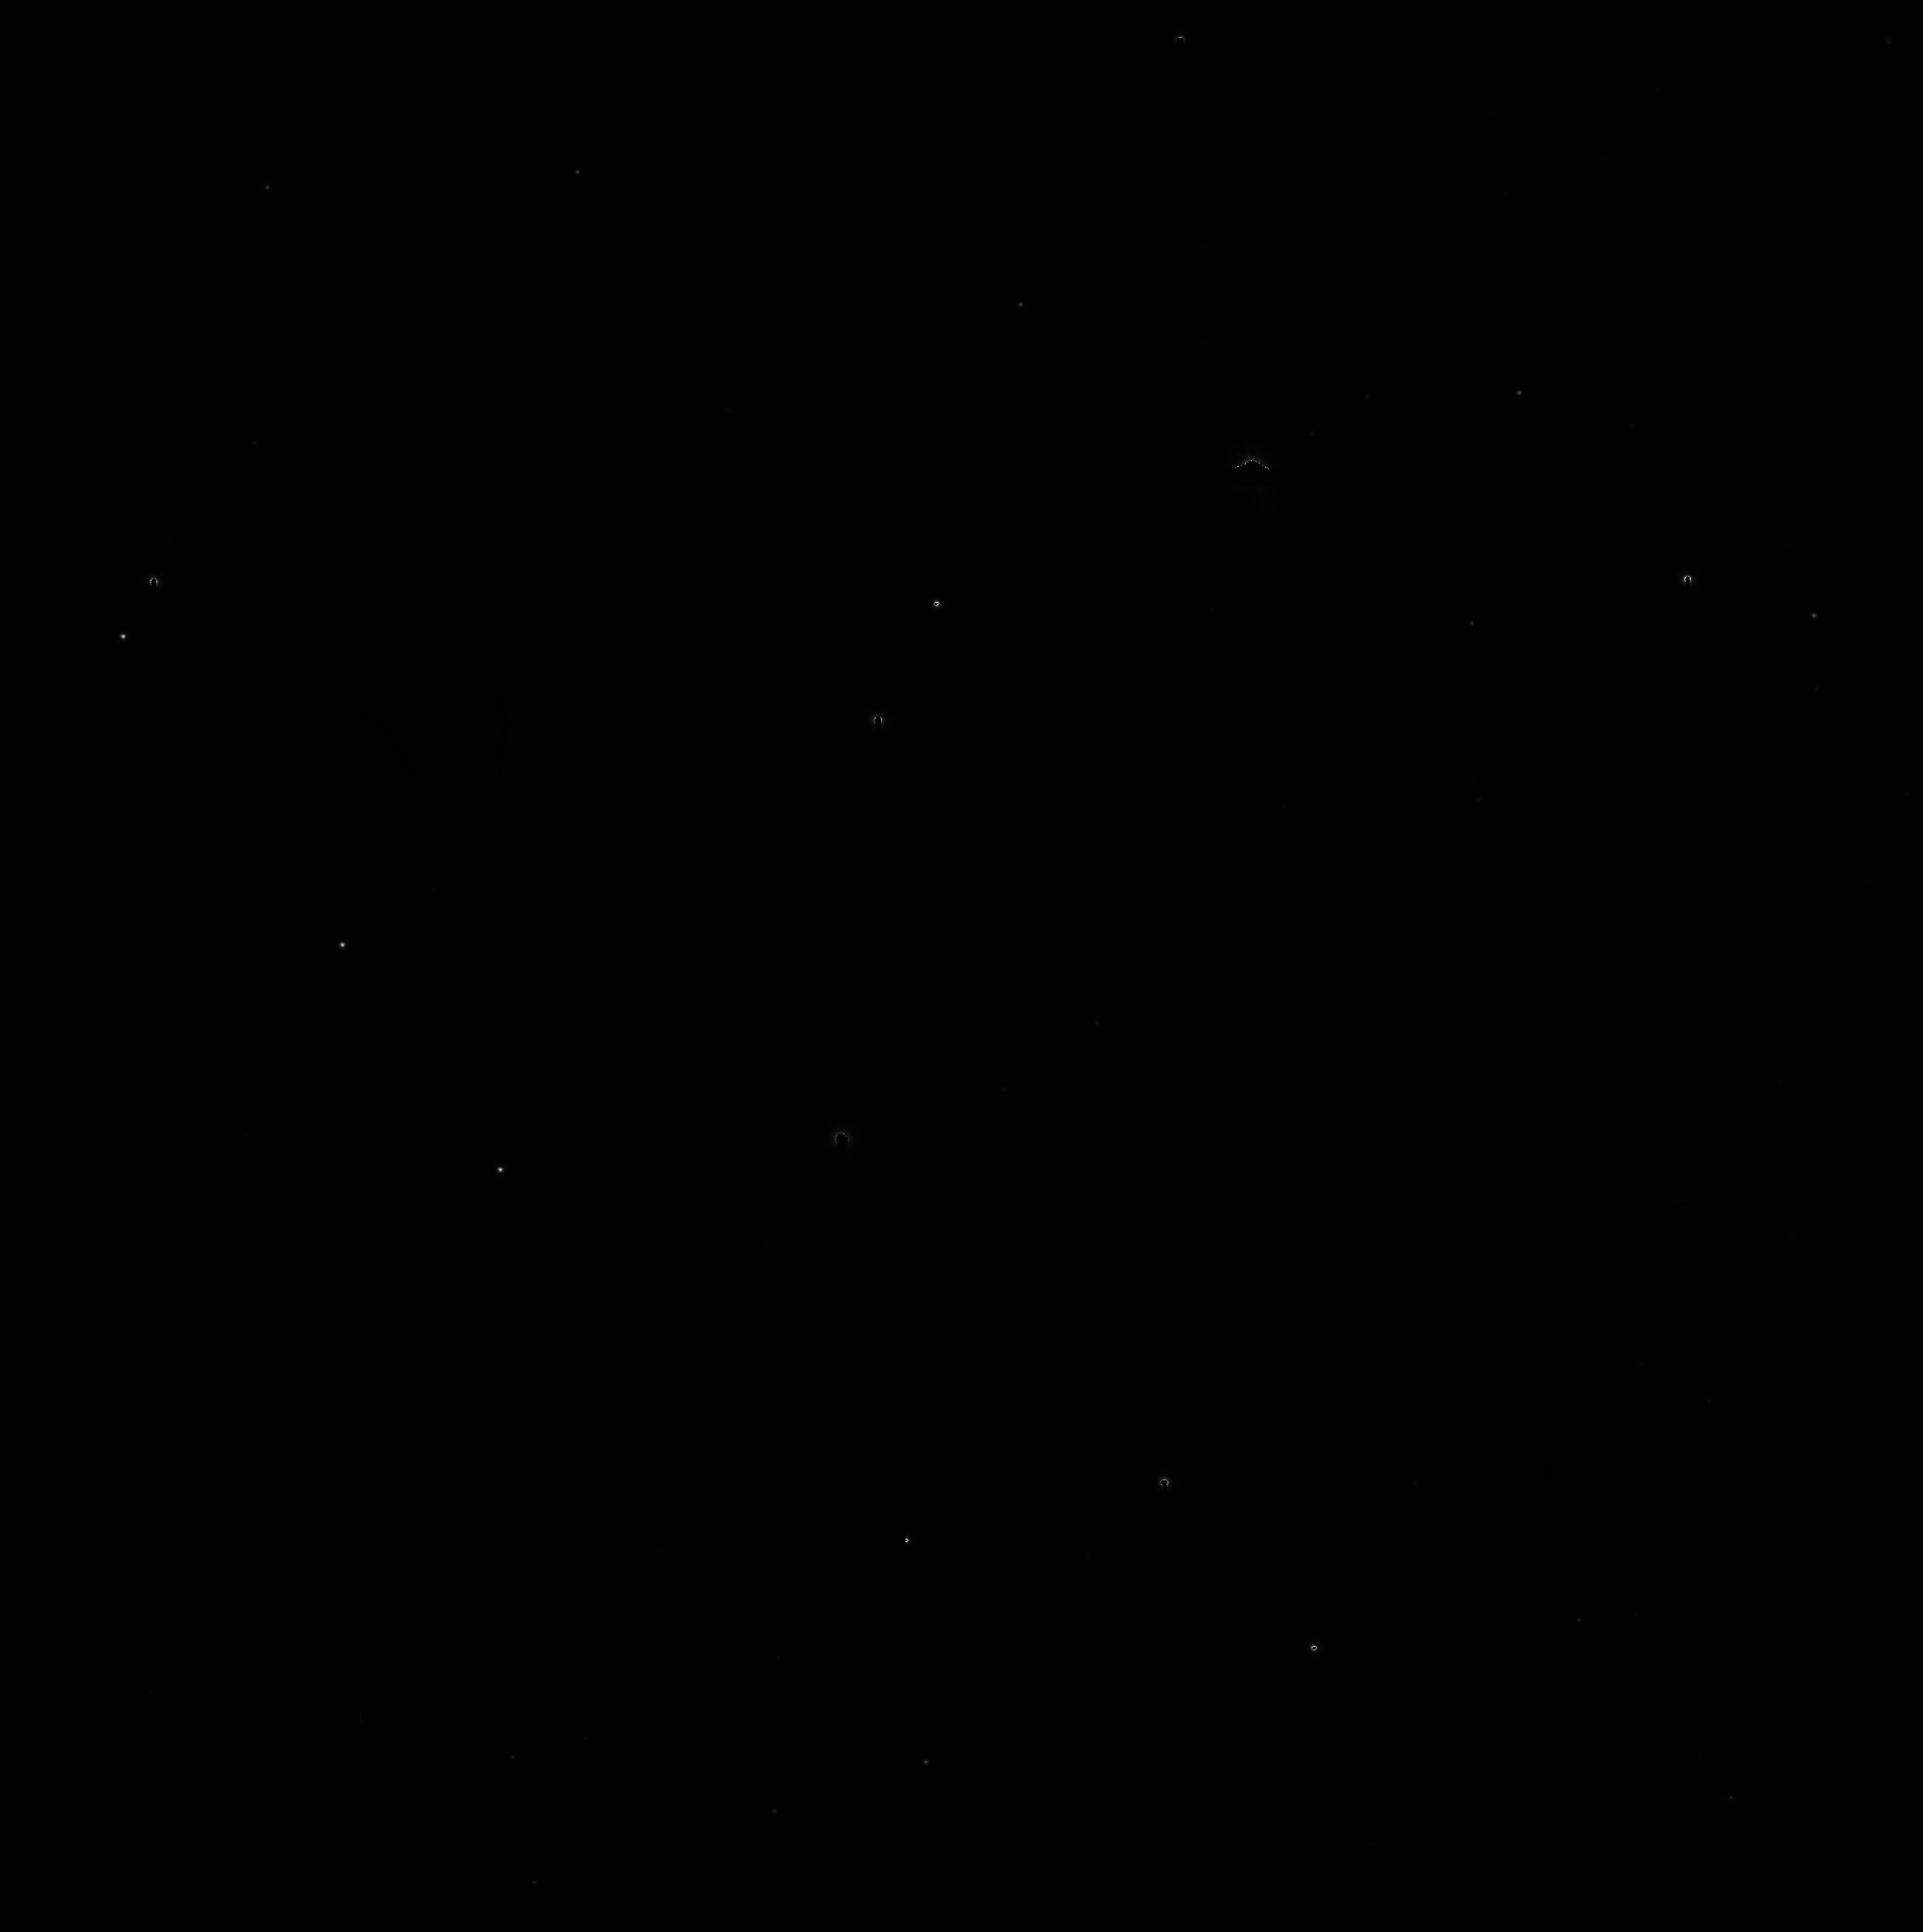

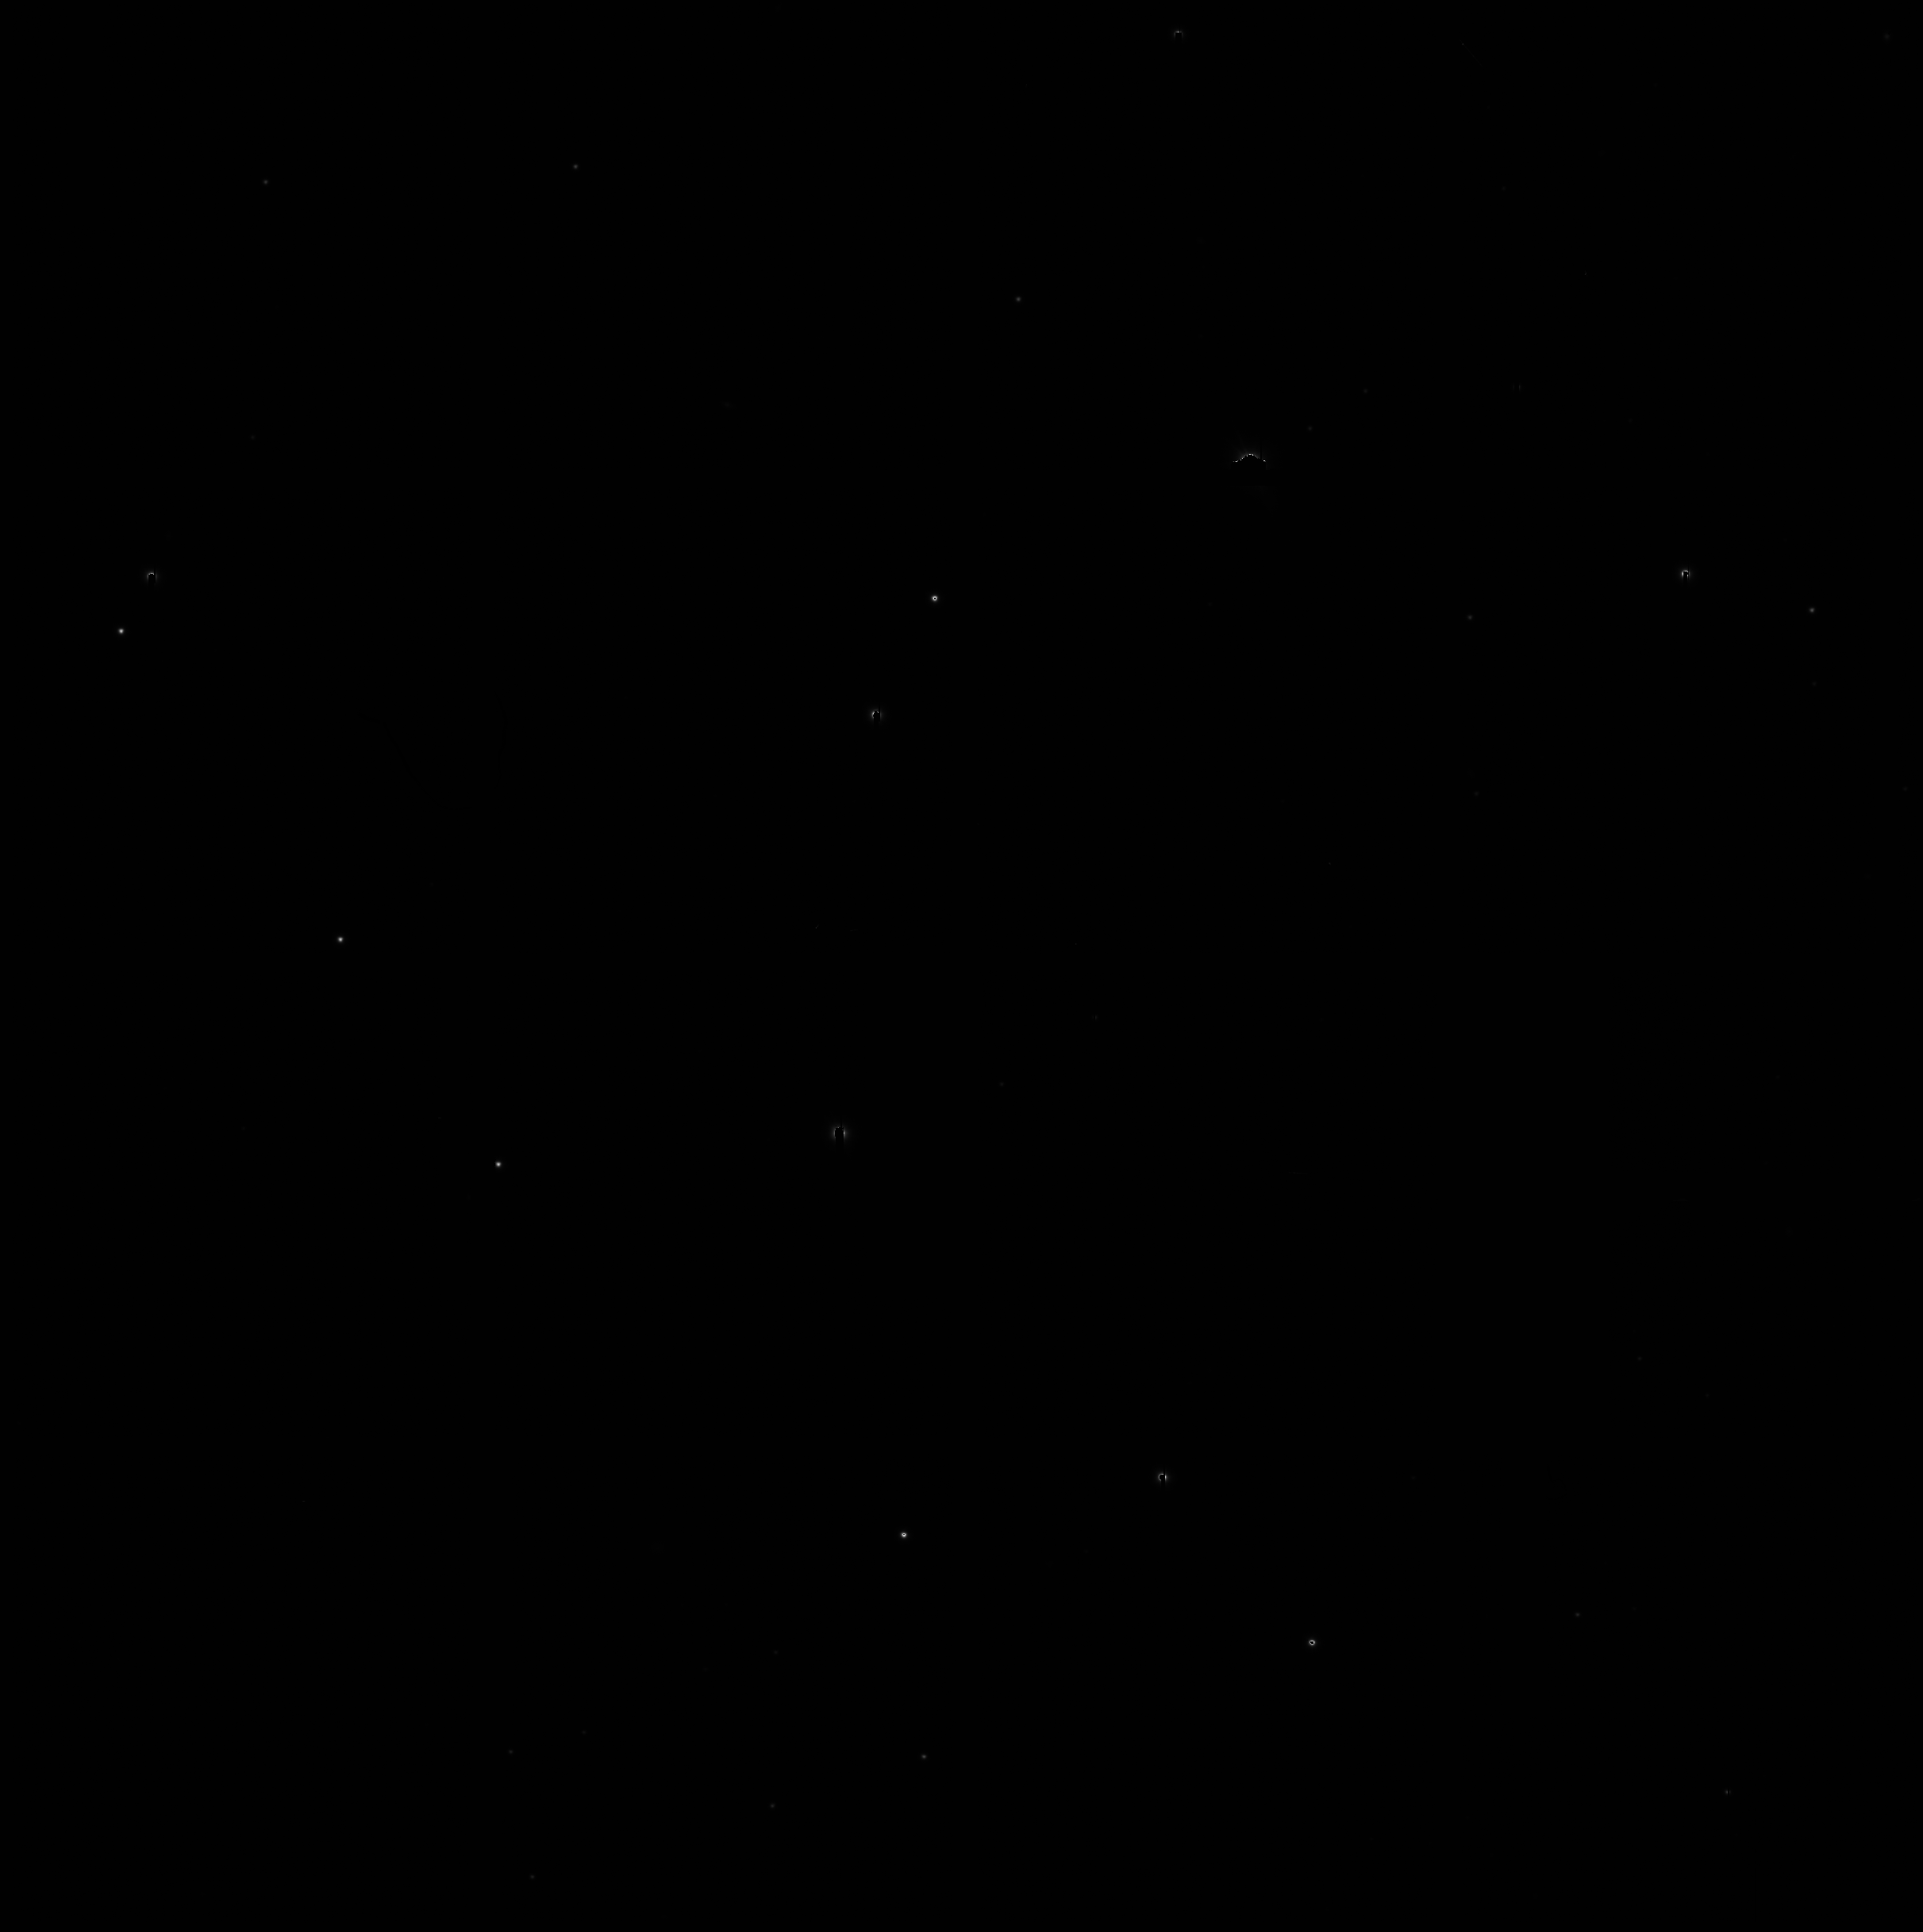

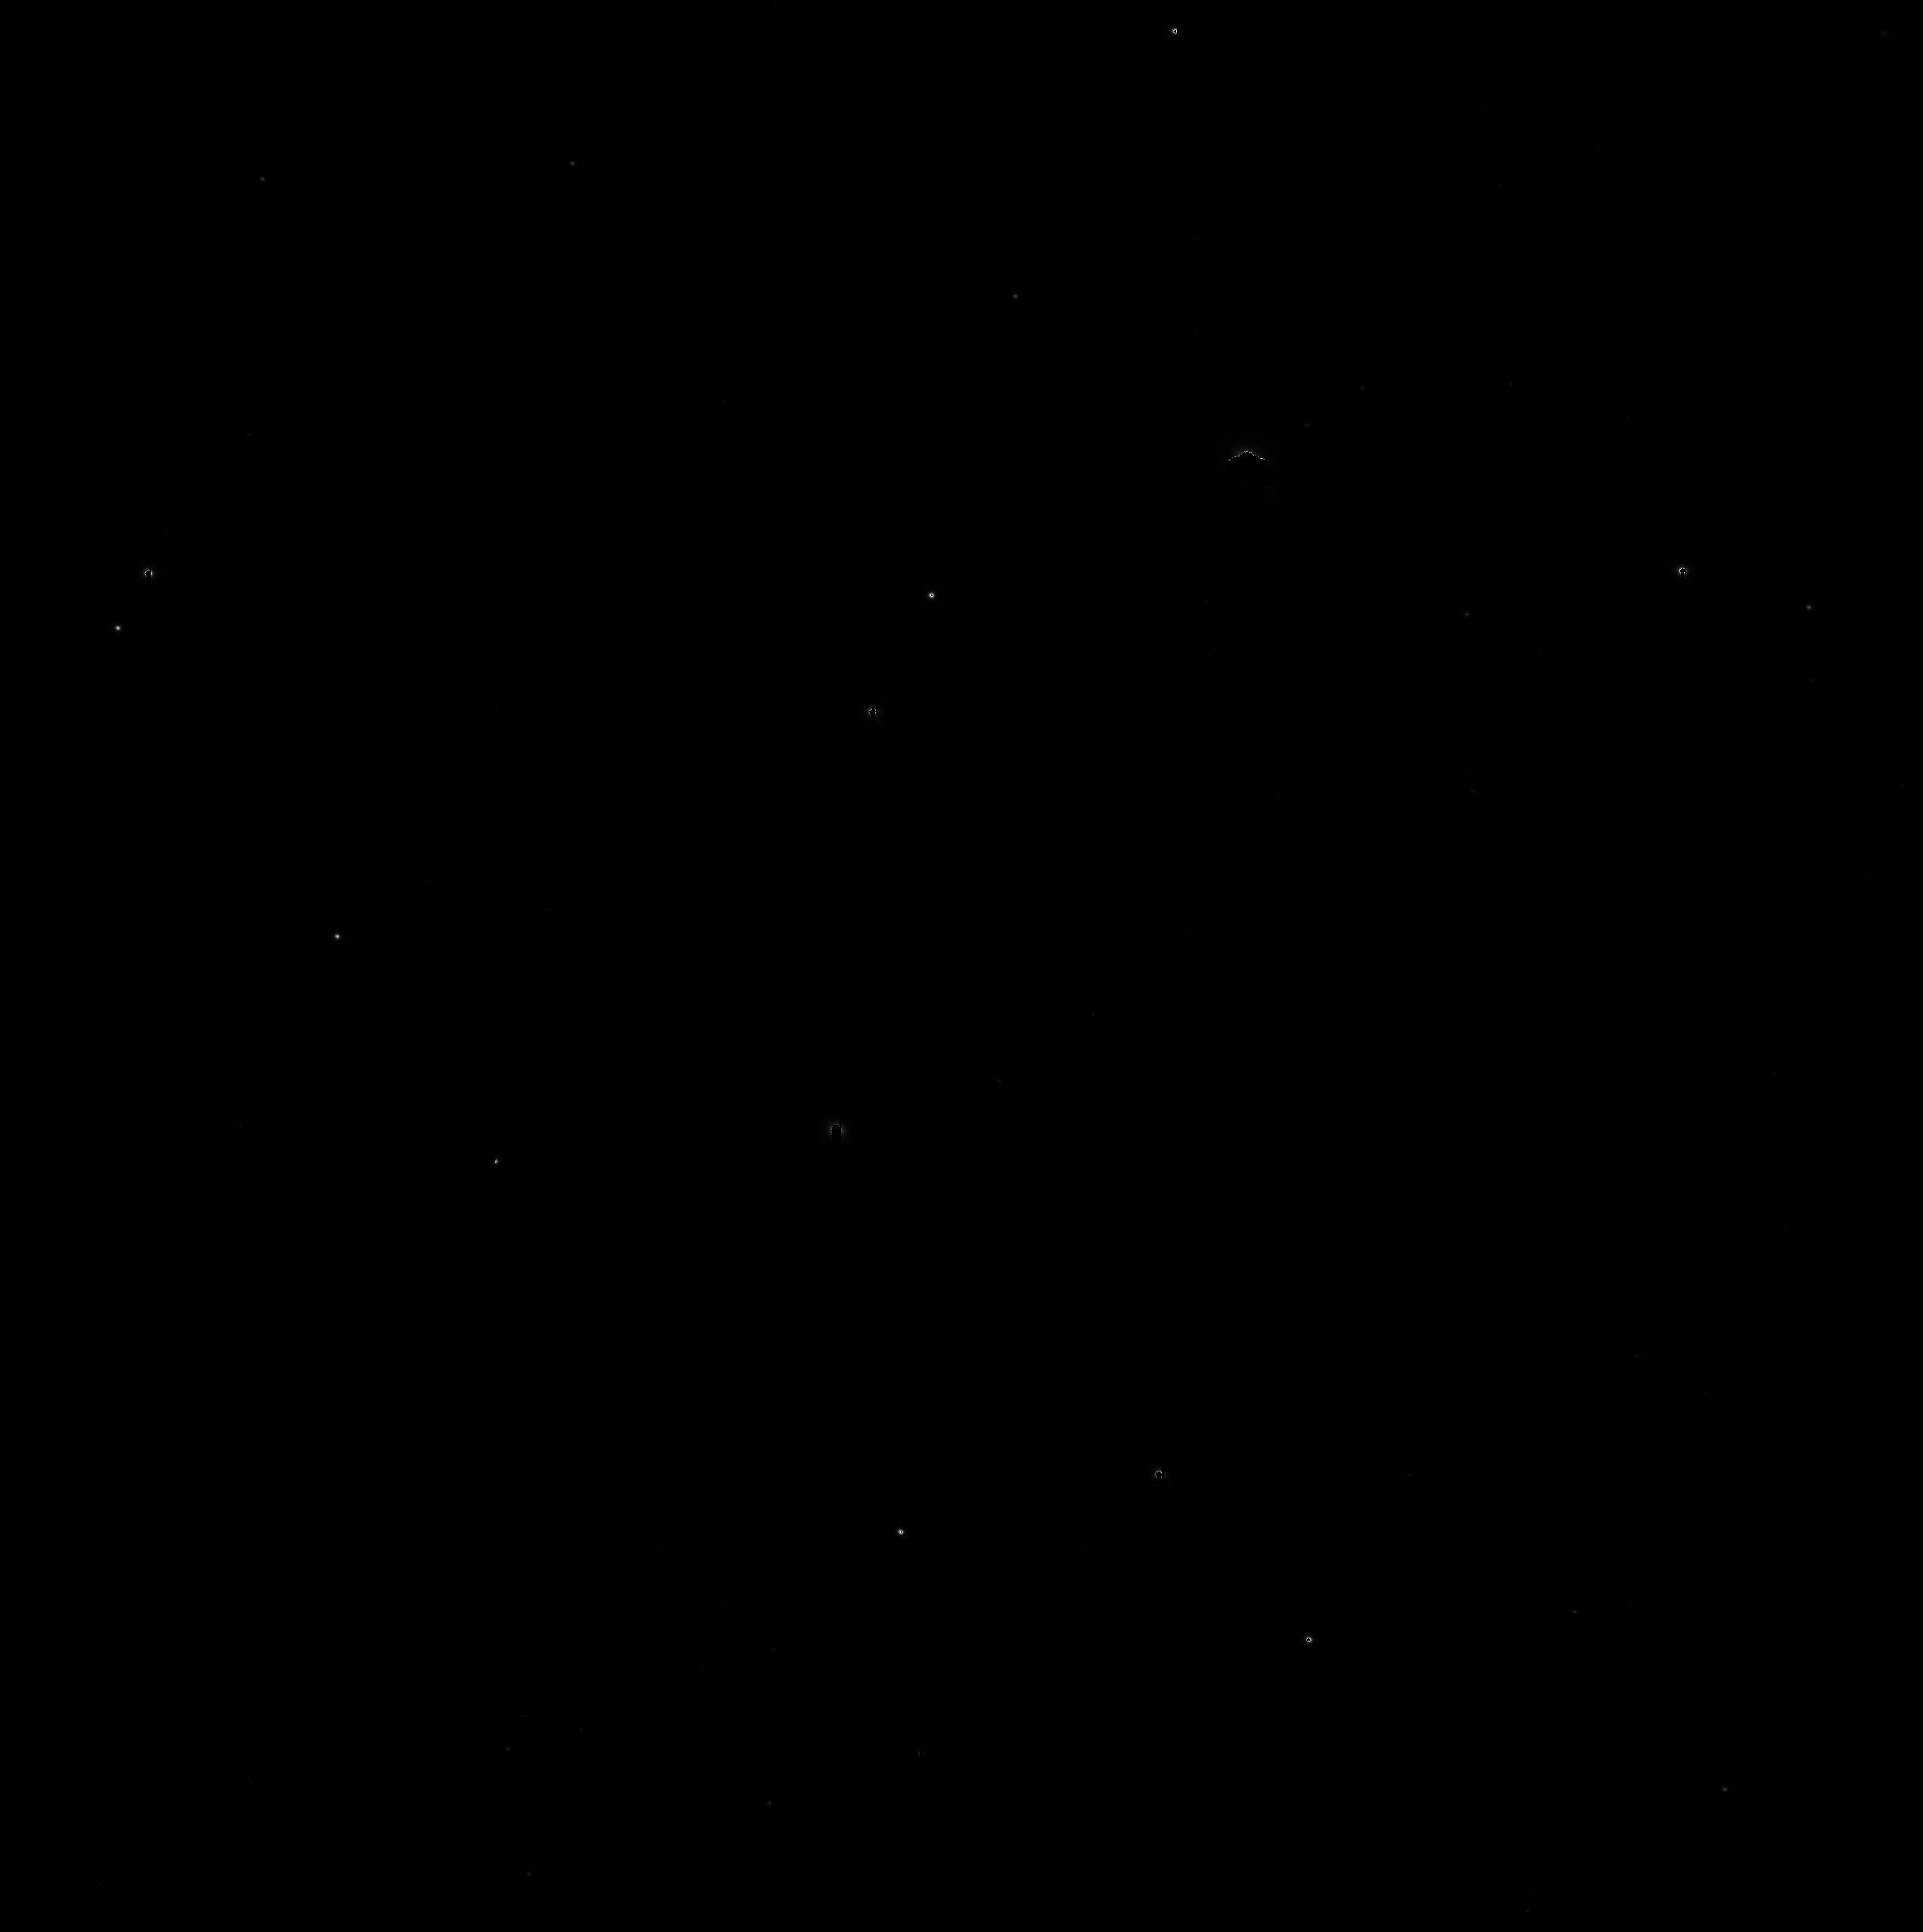

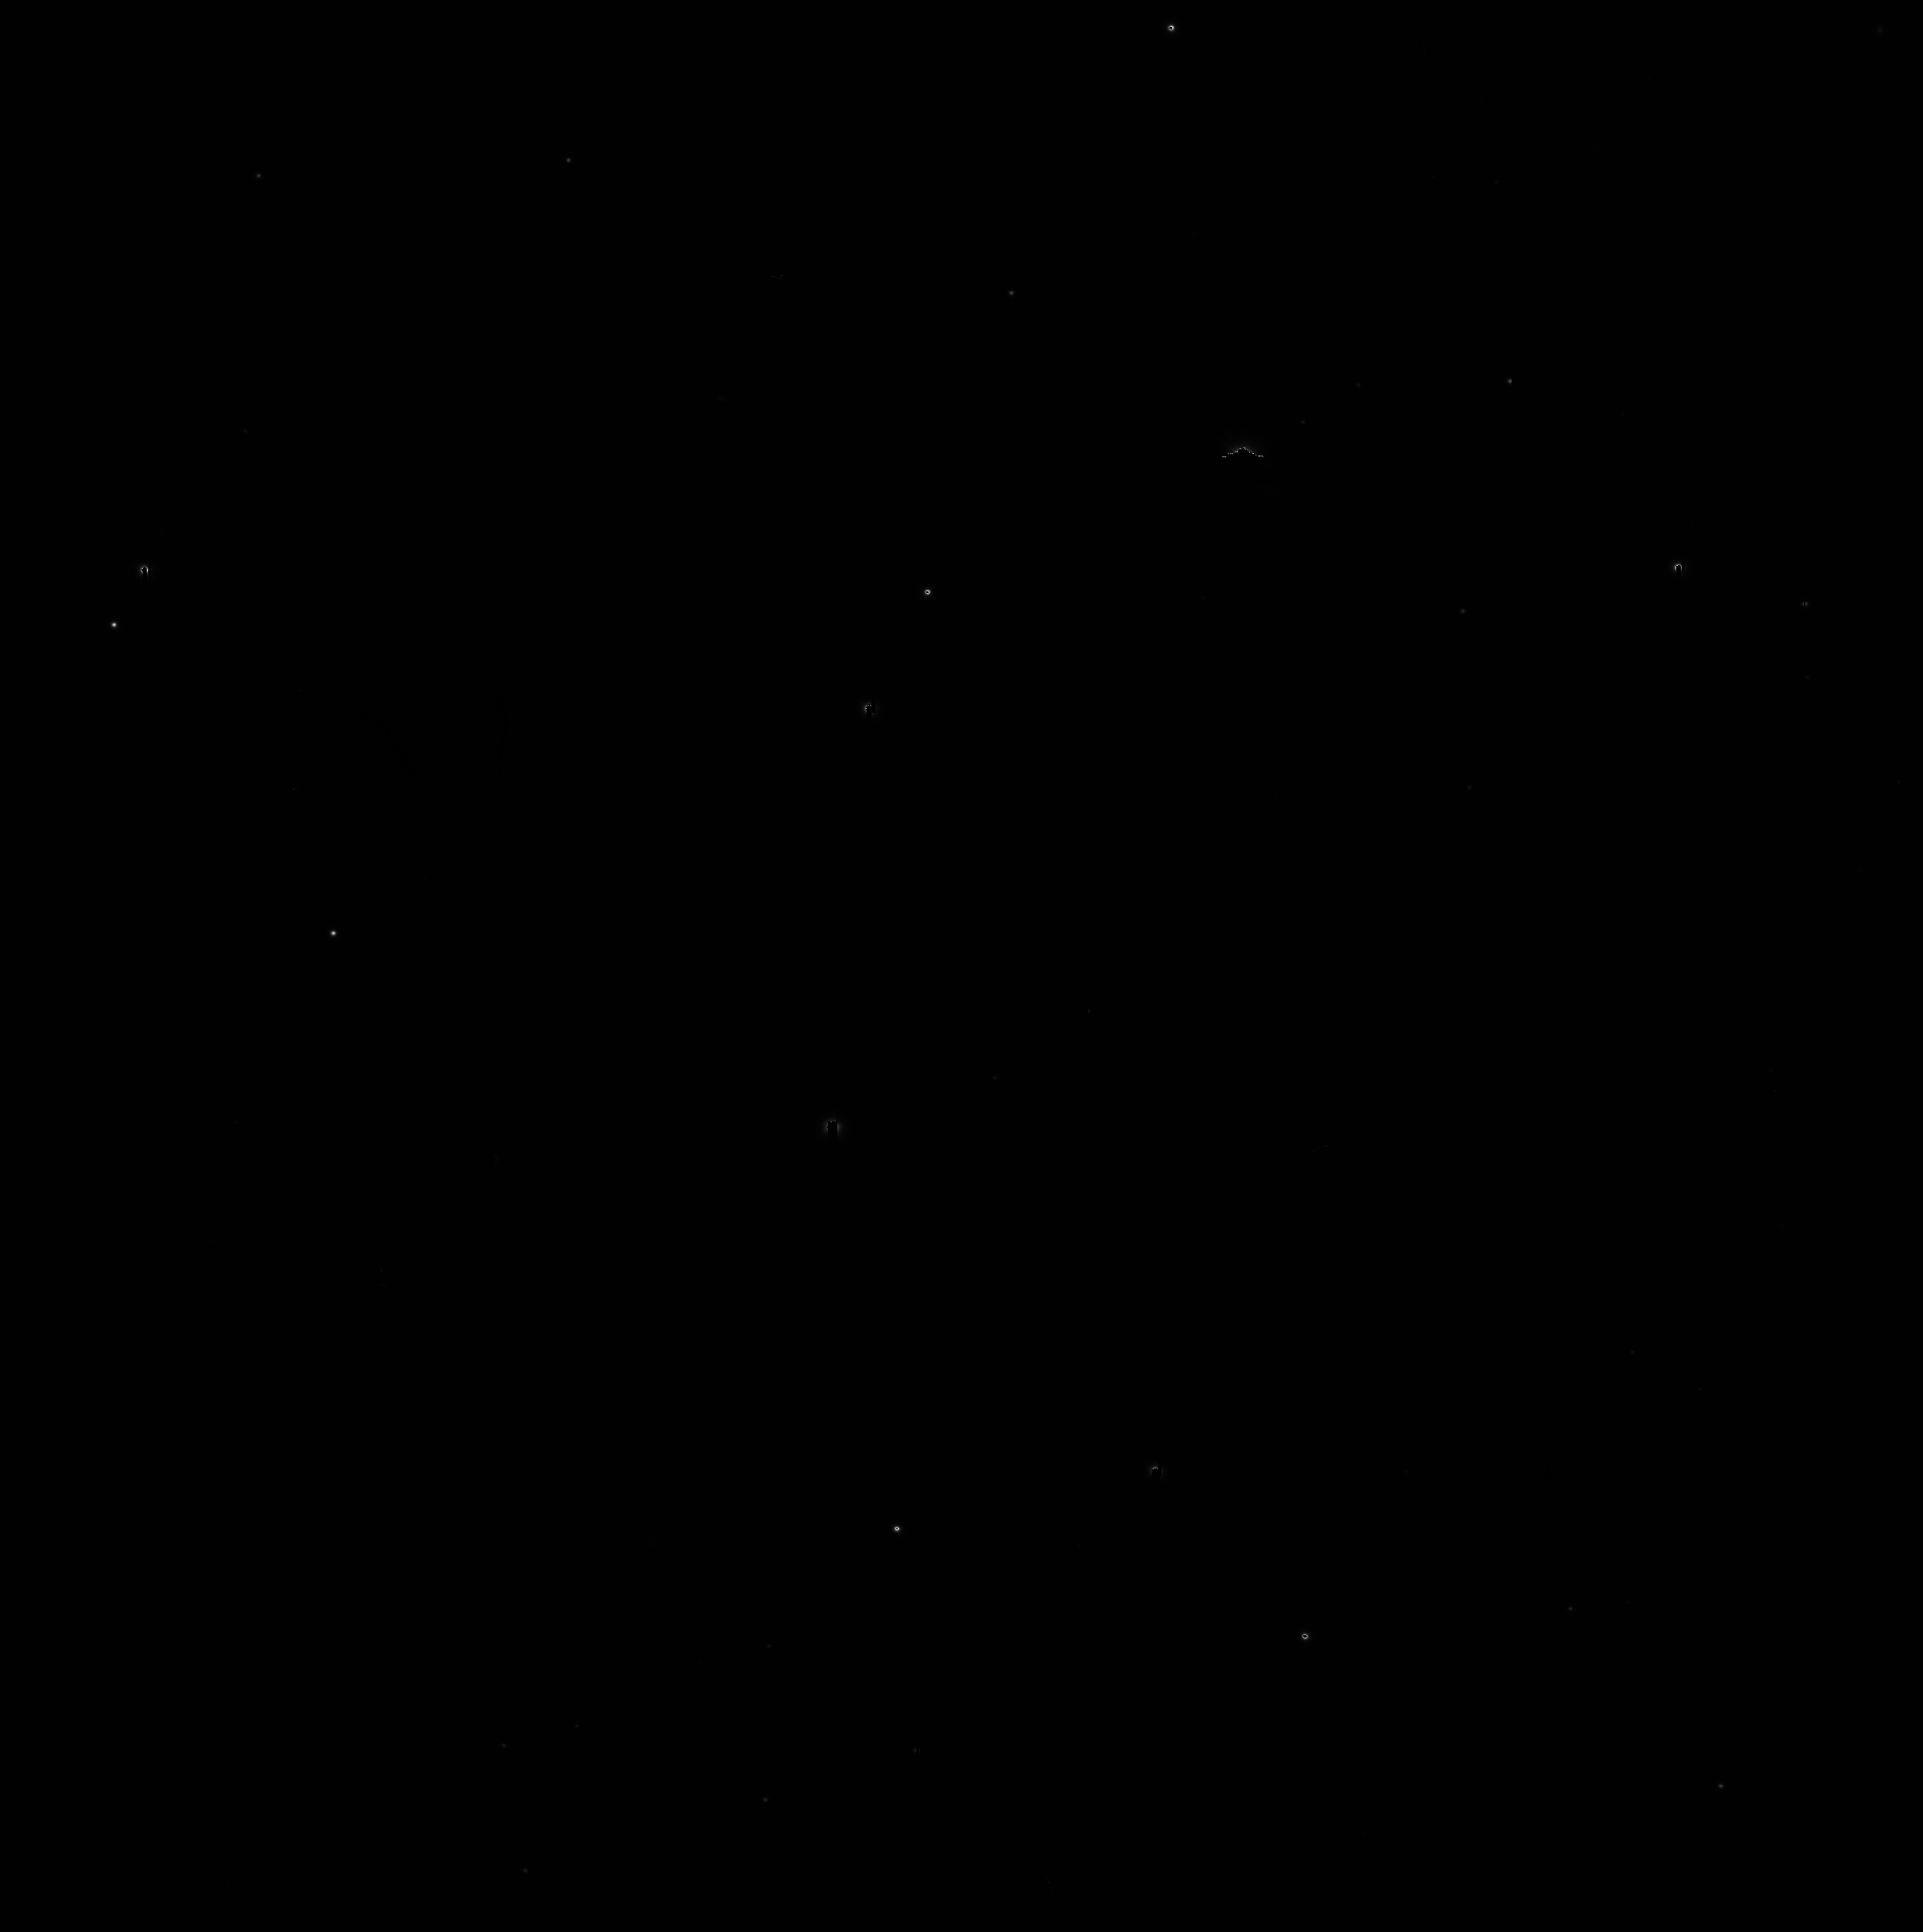

<ipython-input-1-a9189970e9c6>:46: RuntimeWarning: divide by zero encountered in scalar divide
  snr = np.mean(images[i][y:y+h, x:x+w]) / np.std(images[i][y:y+h, x:x+w])


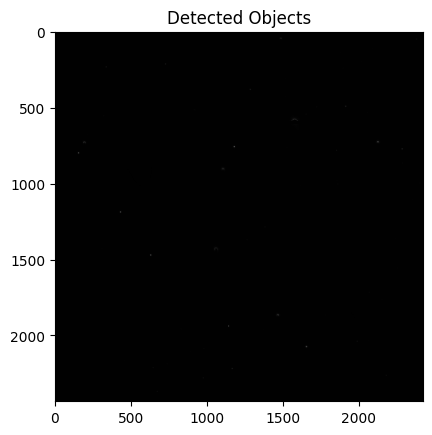

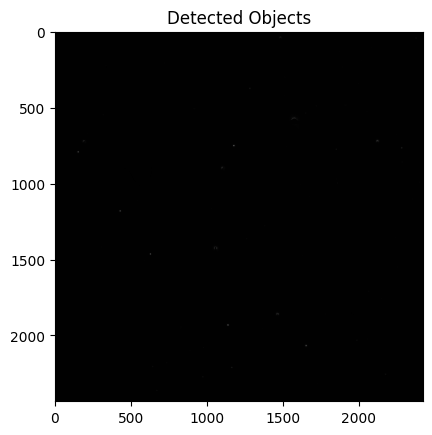

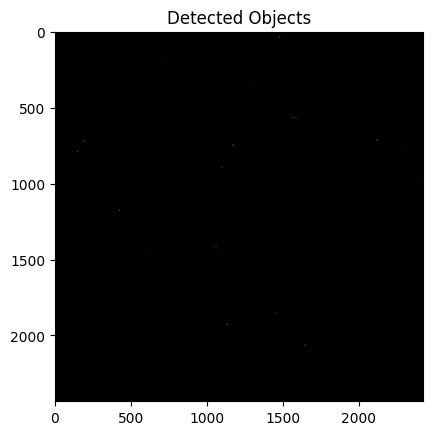

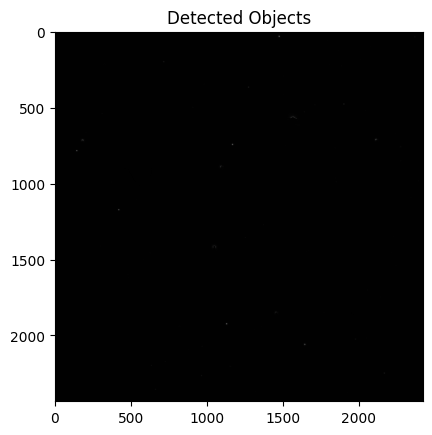

Asteroid detected!


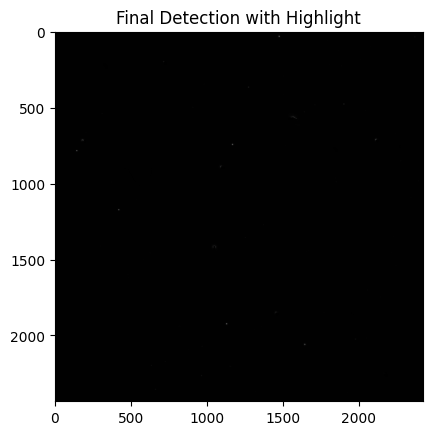

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from astropy.io import fits
import matplotlib.pyplot as plt

def load_fits_image(file_path):
    with fits.open(file_path) as hdul:
        data = hdul[0].data
        data = data.astype(np.float32)
        normalized_data = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX)
        return normalized_data

file_paths = ['image1.fits', 'image2.fits', 'image3.fits', 'image5.fits']
images = [load_fits_image(fp) for fp in file_paths]

for i, img in enumerate(images):
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.show()

def display_images_as_video(images, delay=500):
    for img in images:
        cv2_imshow(img.astype(np.uint8))
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

display_images_as_video(images)

def detect_moving_objects(images):
    moving_objects = []
    for i in range(1, len(images)):
        diff = cv2.absdiff(images[i], images[i-1])

        diff = diff.astype(np.uint8)

        _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

        thresh = thresh.astype(np.uint8)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            snr = np.mean(images[i][y:y+h, x:x+w]) / np.std(images[i][y:y+h, x:x+w])
            radius = max(w, h) / 2

            if 5 < snr < 20 and radius < 3:
                moving_objects.append((x, y, w, h))
                cv2.rectangle(images[i], (x, y), (x+w, y+h), (0, 255, 255), 3)  # Yellow color in BGR, thicker border

    return moving_objects

moving_objects = detect_moving_objects(images)

for img in images:
    plt.imshow(img, cmap='gray')
    plt.title('Detected Objects')
    plt.show()

if moving_objects:
    print("Asteroid detected!")
    for (x, y, w, h) in moving_objects:
        cv2.rectangle(images[-1], (x-5, y-5), (x+w+5, y+h+5), (0, 255, 255), 3)

    plt.imshow(images[-1], cmap='gray')
    plt.title('Final Detection with Highlight')
    plt.show()
else:
    print("No asteroid detected.")